In [1]:
"""
In this notebook, some analyses are done on the result of SFCT and ISFCT.
The instances are assumed to have similar distributions. 
All instances are considered stochastic.
"""

'\nIn this notebook, some analyses are done on the result of SFCT and ISFCT.\nThe instances are assumed to have similar distributions. \nAll instances are considered stochastic.\n'

In [1]:
import numpy as np
import pandas as pd
import math
from scipy.stats import skewnorm
import sys
import os
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
tests = [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 10), (2, 1), (2, 2), (2, 3),
         (2, 4), (2, 5), (2, 6), (2, 7), (2, 9), (2, 10), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6),
         (3, 7), (3, 8), (3, 9), (3, 10), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8),
         (4, 9), (4, 10), (7, 1), (7, 6), (7, 7), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7),
         (8, 8), (8, 9), (8, 10), (11, 3), (11, 9), (12, 1), (12, 2), (12, 3), (12, 4), (12, 5), (12, 6),
         (12, 7), (12, 8), (12, 9), (12, 10), (15, 2), (15, 4), (16, 1), (16, 2), (16, 3), (16, 4), (16, 5),
         (16, 6), (16, 7), (16, 8), (16, 9), (16, 10), (17, 1), (17, 2), (17, 3), (17, 4), (17, 5), (17, 6),
         (17, 7), (17, 8), (17, 9), (17, 10), (18, 1), (18, 2), (18, 3), (18, 4), (18, 5), (18, 6), (18, 7),
         (18, 8), (18, 9), (18, 10), (19, 1), (19, 2), (19, 3), (19, 4), (19, 5), (19, 6), (19, 7), (19, 8),
         (19, 9), (19, 10), (20, 1), (20, 2), (20, 3), (20, 4), (20, 5), (20, 6), (20, 7), (20, 8), (20, 9),
         (20, 10), (23, 1), (23, 2), (23, 3), (23, 4), (23, 6), (23, 10), (24, 1), (24, 3), (24, 4), (24, 5),
         (24, 6), (24, 7), (24, 8), (24, 9), (24, 10), (27, 2), (27, 3), (27, 4), (27, 10), (28, 1), (28, 2),
         (28, 4), (28, 5), (28, 6), (28, 7), (28, 8), (28, 9), (28, 10), (31, 1), (31, 2), (31, 3), (31, 4),
         (31, 6), (32, 1), (32, 2), (32, 3), (32, 5), (32, 6), (32, 7), (32, 8), (32, 9), (32, 10), (33, 1),
         (33, 2), (33, 3), (33, 4), (33, 5), (33, 6), (33, 7), (33, 8), (33, 9), (33, 10), (34, 1), (34, 2),
         (34, 3), (34, 4), (34, 5), (34, 6), (34, 7), (34, 8), (34, 9), (34, 10), (35, 1), (35, 2), (35, 3),
         (35, 4), (35, 5), (35, 6), (35, 7), (35, 8), (35, 9), (35, 10), (36, 1), (36, 2), (36, 3), (36, 4),
         (36, 5), (36, 6), (36, 7), (36, 8), (36, 9), (36, 10), (38, 4), (38, 6), (39, 1), (39, 2), (39, 3),
         (39, 4), (39, 5), (39, 6), (39, 7), (39, 8), (39, 9), (39, 10), (40, 1), (40, 2), (40, 3), (40, 4),
         (40, 5), (40, 6), (40, 7), (40, 8), (40, 9), (40, 10), (42, 10), (43, 2), (44, 1), (44, 2), (44, 3),
         (44, 4), (44, 5), (44, 6), (44, 7), (44, 8), (44, 9), (44, 10), (47, 2), (48, 1), (48, 2), (48, 3),
         (48, 4), (48, 5), (48, 6), (48, 7), (48, 8), (48, 9), (48, 10)]

In [21]:
rep = 20
res = []
ii = []
ss = []
for k in tests:
    sfct = pd.read_csv('sfct_simul/' + str(k[0]) + '_' + str(k[1]) + '.simul', header=None)
    isfct = pd.read_csv('isfct_simul/' + str(k[0]) + '_' + str(k[1]) + '.simul', header=None)
    s = np.array(list(sfct[0]))[:rep]
    s = s[(s!='FALSE')&(s!='EXCEPT')]
    s = np.array(s).astype(np.float).min()
    i = np.array(list(isfct[0]))[:rep]
    i = i[(i!='FALSE')&(i!='EXCEPT')]
    i = np.array(i).astype(np.float).min()
    res.append((s-i)/s)
    ii.append(i)
    ss.append(s)
res = np.array(res)
ii = np.array(ii)
ss = np.array(ss)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if __name__ == '__main__':
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if sys.path[0] == '':


In [22]:
print('Min = {}'.format(res.min()))
print('Max = {}'.format(res.max()))
print('Mean = {}'.format(res.mean()))
print('> 0.01 = {}'.format(len(res[res>0.01])/len(res)))
print('> 0.05 = {}'.format(len(res[res>0.05])/len(res)))


Min = -0.04450257311101099
Max = 0.19596054844940508
Mean = 0.02215062806775801
> 0.01 = 0.47520661157024796
> 0.05 = 0.16115702479338842


In [25]:
len(ii)

242

In [26]:
len(ss)

242

In [29]:
ii.std()

3.29416588806071

In [30]:
ss.std()

3.3152102553600553

In [31]:
ii.mean()

6.770225059040289

In [32]:
ss.mean()

6.899525635940878

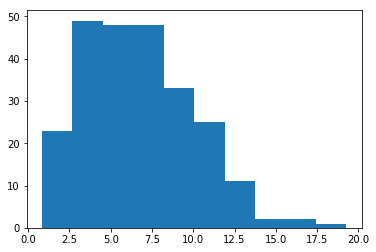

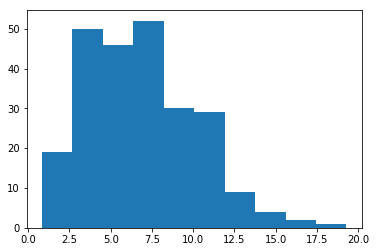

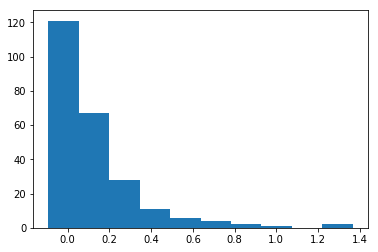

In [37]:
plt.hist(ii)
plt.show()
plt.hist(ss)
plt.show()
plt.hist(ss-ii)
plt.show()

In [38]:
d = {'i':ii, 's':ss}

In [41]:
df = pd.DataFrame(d)

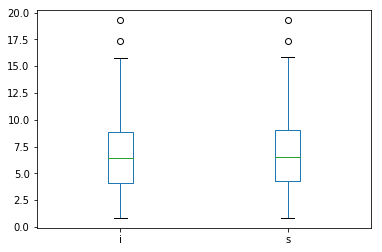

In [43]:
df[['i', 's']].plot(kind='box')
# This saves the plot as a png file
plt.savefig('boxplot_outliers.png')

In [44]:
df['diff'] = df['s'] - df['i']

Text(0.5, 1.0, 'Expected Inventory Cost Difference Q-Q Plot')

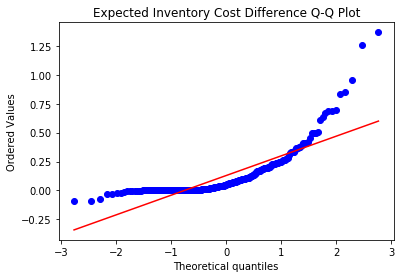

In [51]:
from scipy import stats
stats.probplot(df['diff'], plot= plt)
plt.title('Expected Inventory Cost Difference Q-Q Plot')

In [49]:
stats.wilcoxon(df['diff'])

WilcoxonResult(statistic=893.0, pvalue=1.5153888007593263e-32)

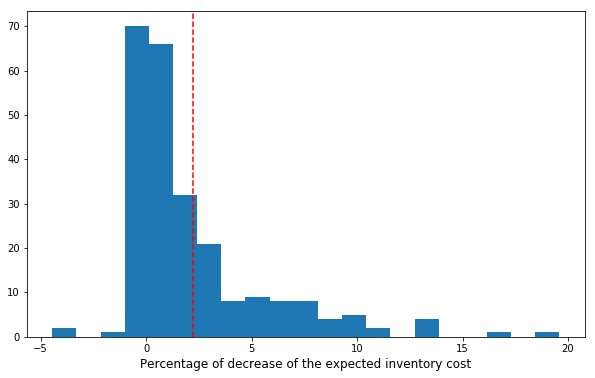

In [19]:
plt.figure(figsize=(10,6))
plt.hist(res*100, bins=21)
plt.xlabel('Percentage of decrease of the expected inventory cost', fontsize=12);
plt.axvline(x=res.mean()*100, color='r', linestyle='--')
plt.show()

In [ ]:
"""
The red line show the result of FCT in which the mean of each distribution is considered.
The blue lines show the result of each of the SFCT runs. around 50 different runs exist for each problem.
Intrestingly, these figures shows considering the mean of distributions is NOT a good idea at all!
"""

for i,j in d0.keys():
    fig = plt.figure()
    fig.suptitle('{}  -  {}'.format(i,j))
    for c in d[i,j]:
        plt.plot([c,c], [0,1], 'b', alpha=0.3)
    plt.plot([d0[i,j], d0[i,j]], [0, 1], 'r')
    plt.yticks([])
    plt.xlabel('Expected Makespan', fontsize=12)
    plt.show()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  import sys
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  # Remove the CWD from sys.path while we load stuff.


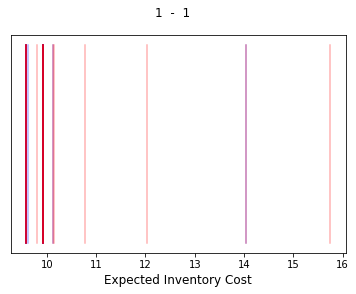

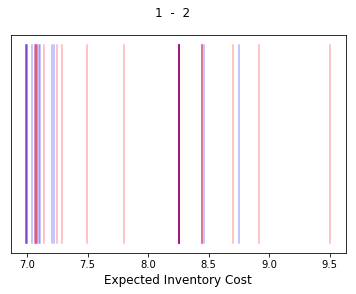

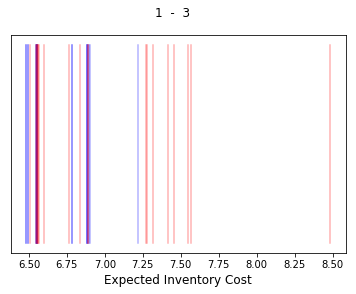

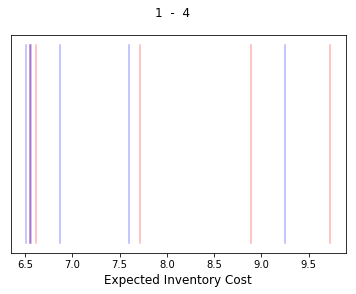

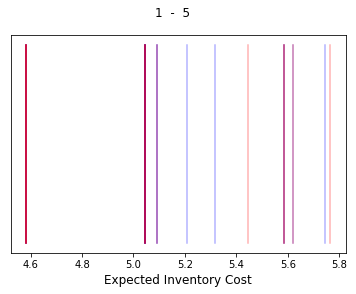

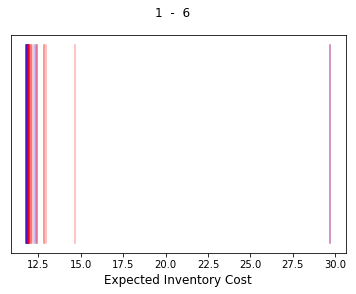

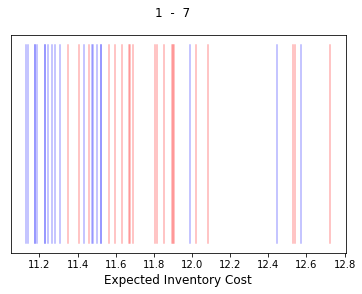

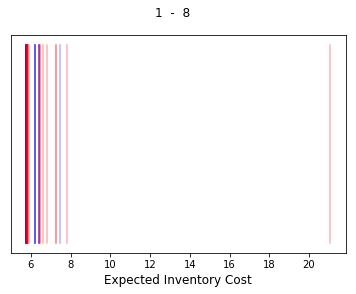

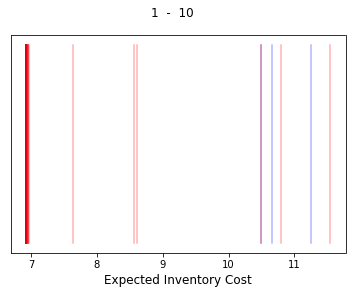

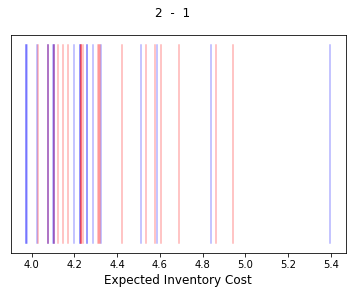

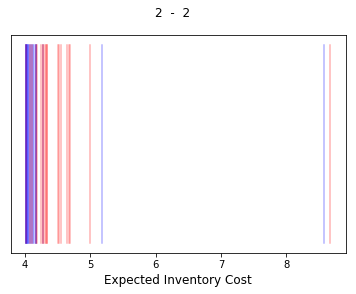

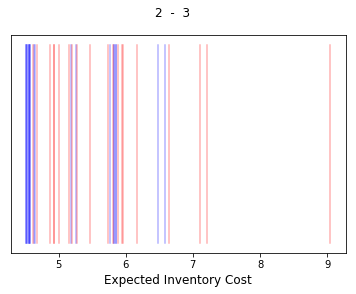

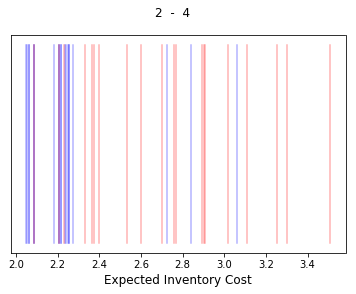

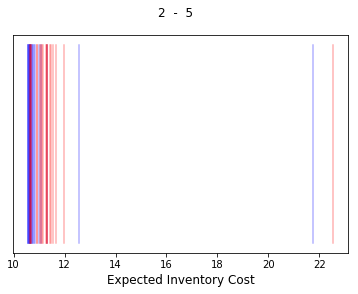

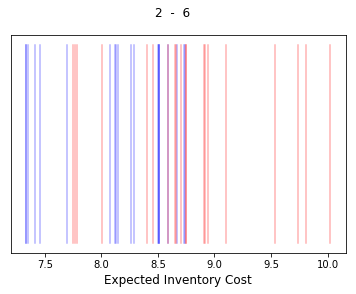

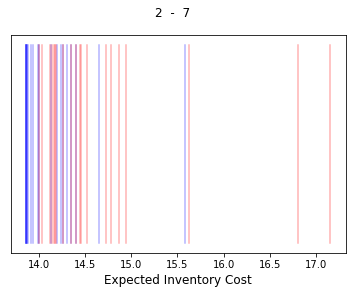

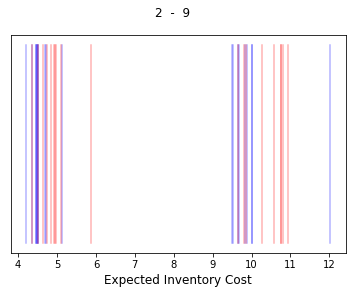

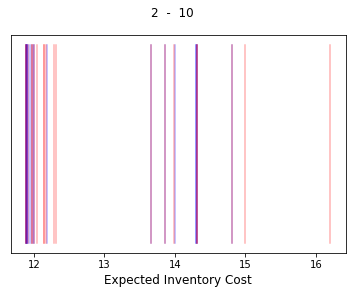

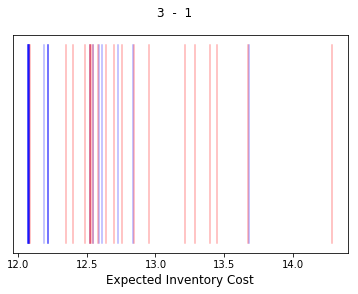

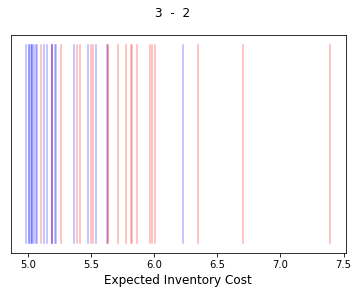

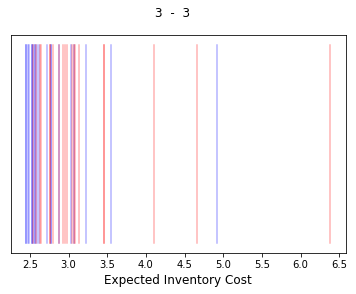

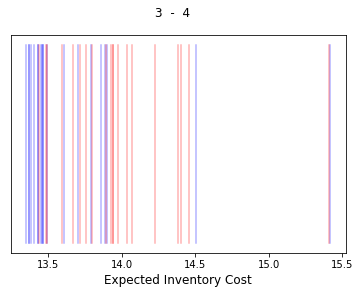

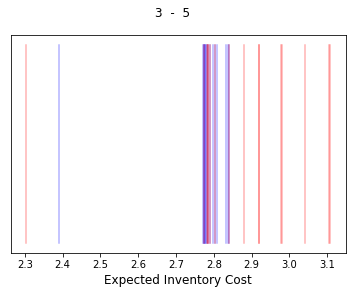

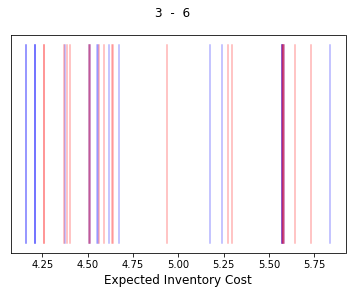

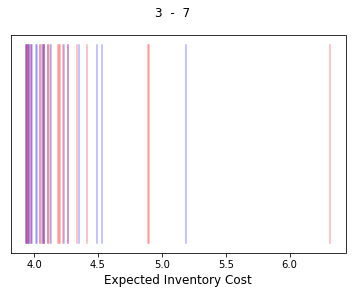

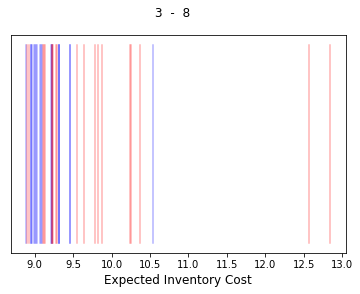

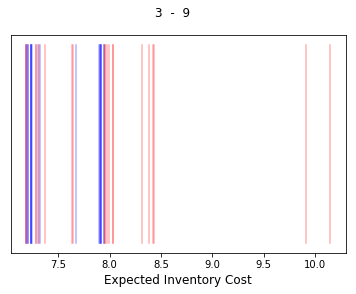

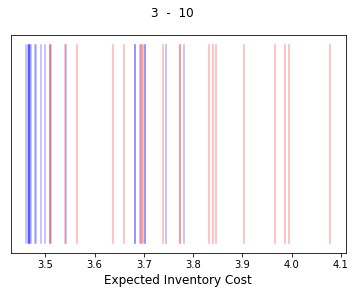

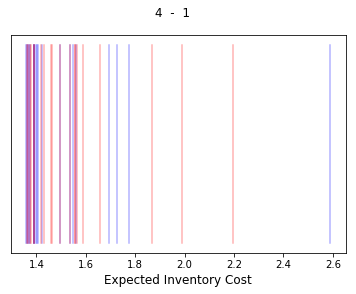

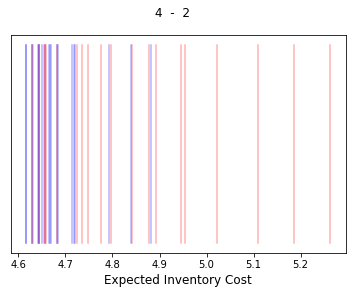

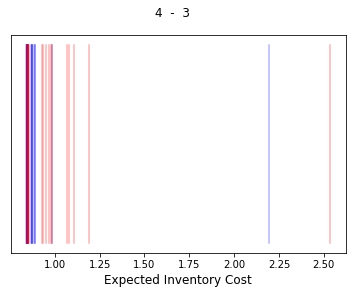

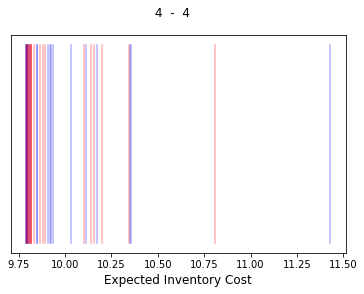

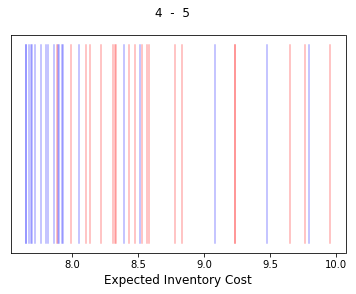

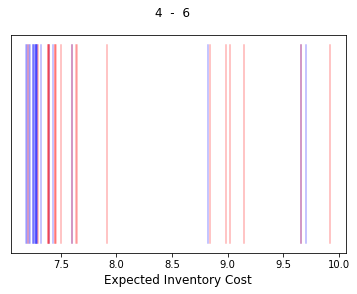

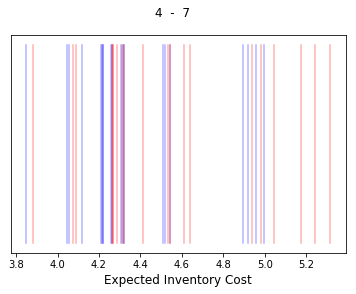

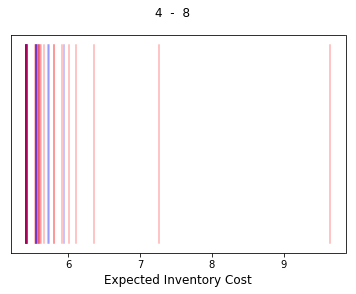

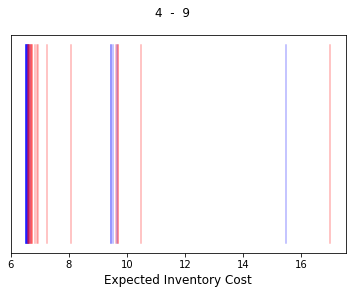

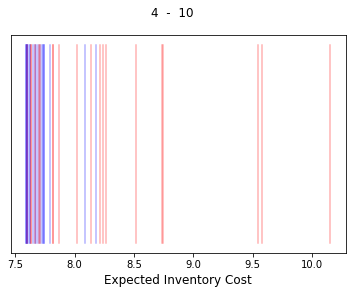

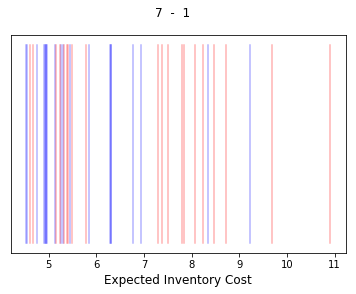

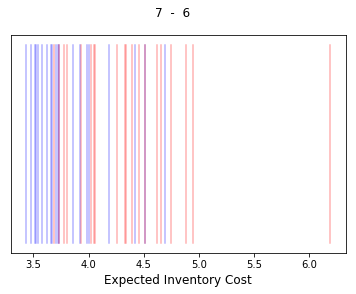

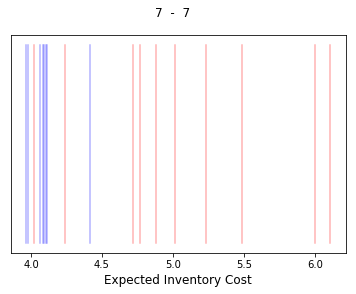

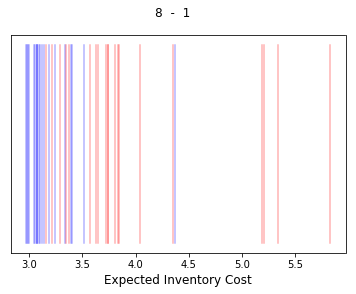

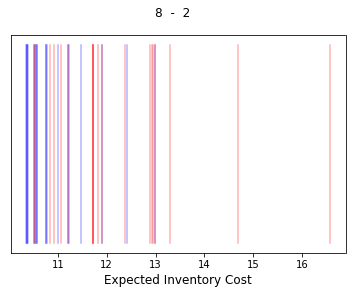

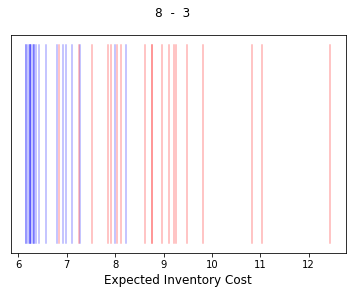

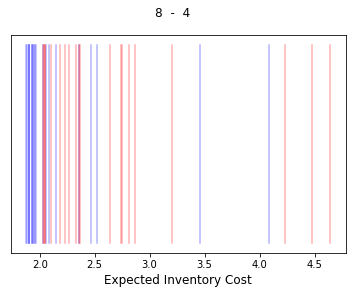

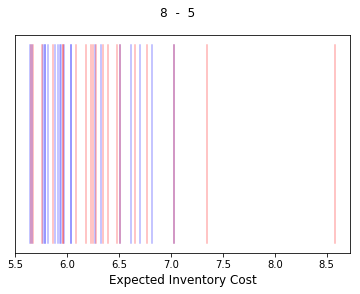

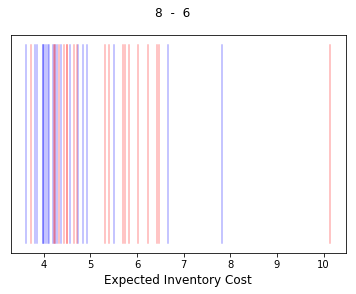

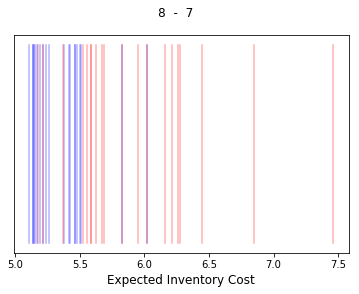

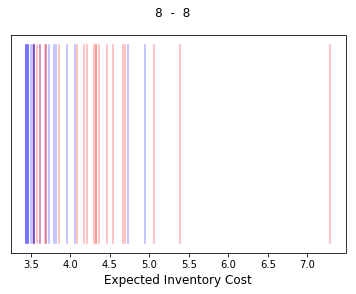

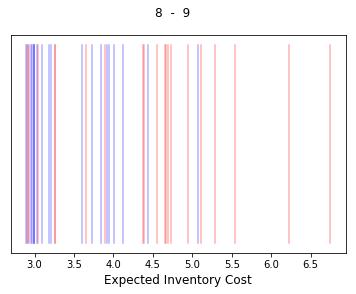

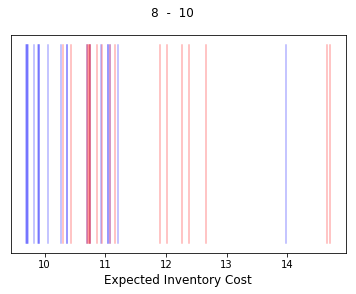

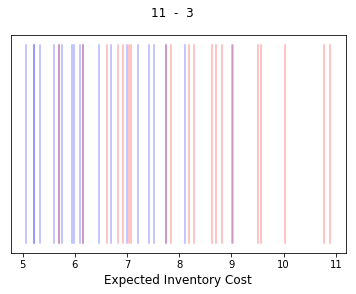

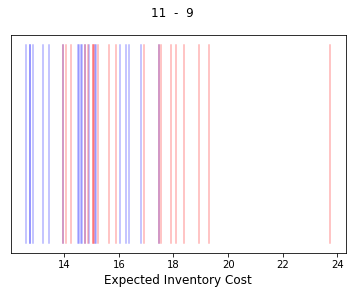

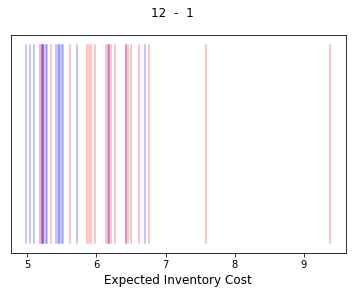

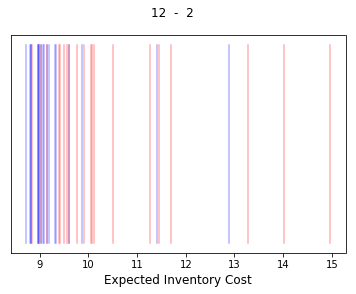

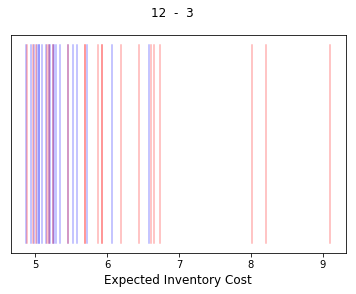

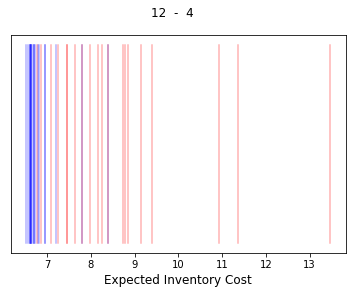

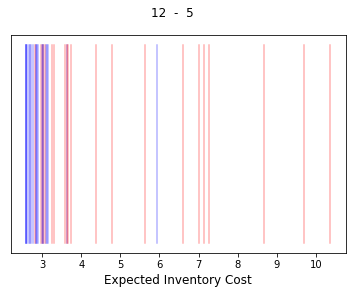

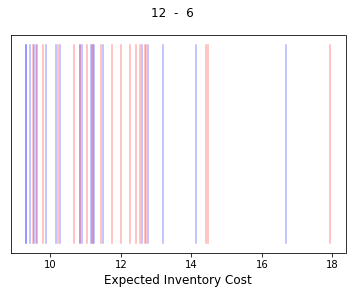

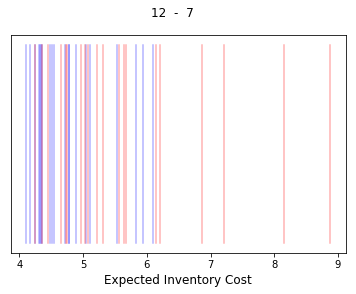

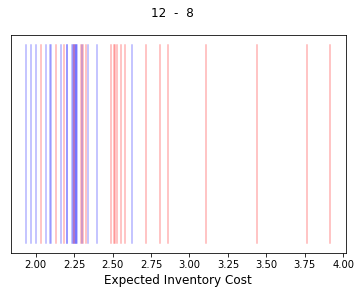

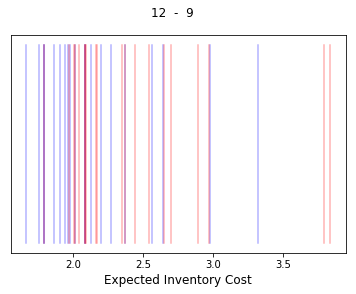

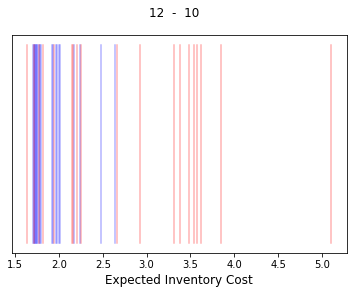

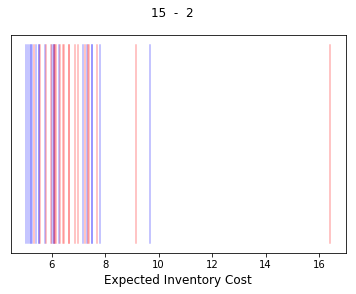

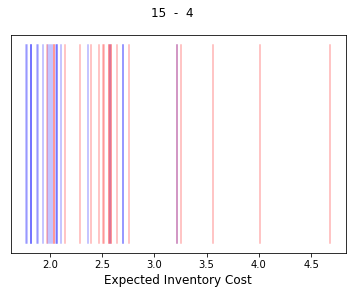

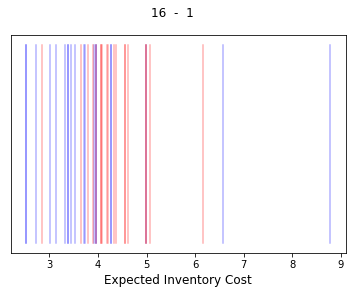

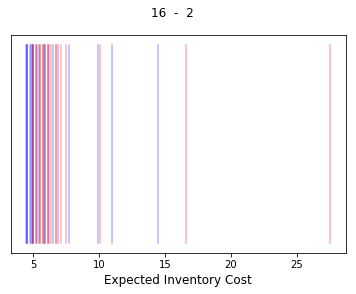

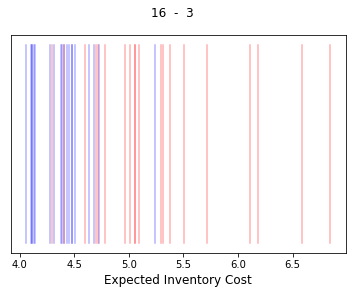

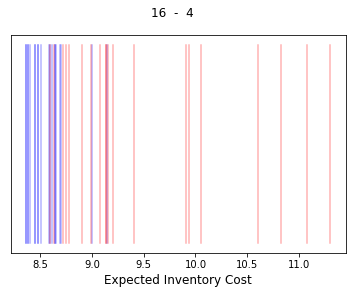

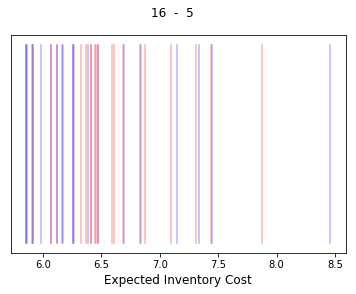

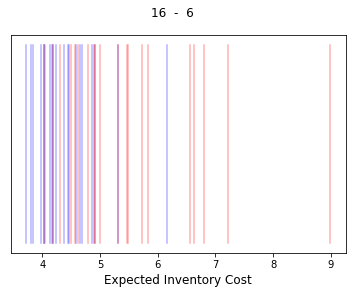

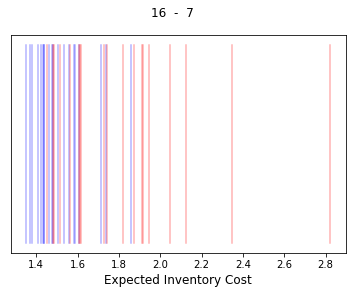

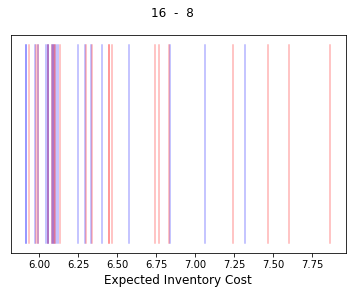

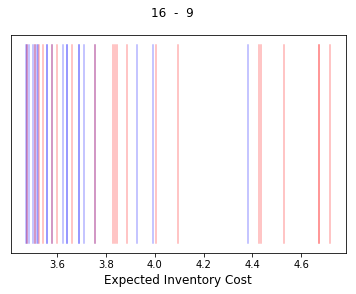

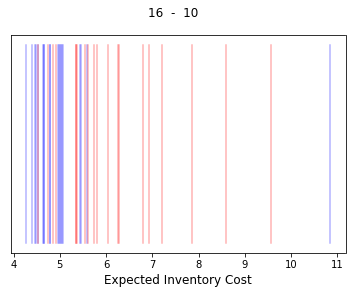

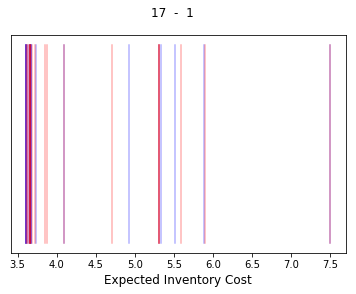

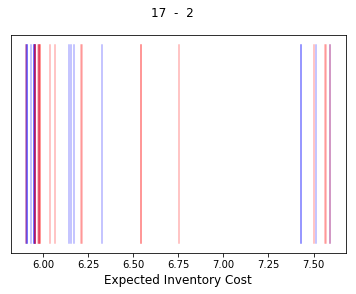

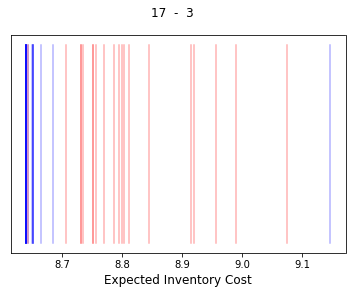

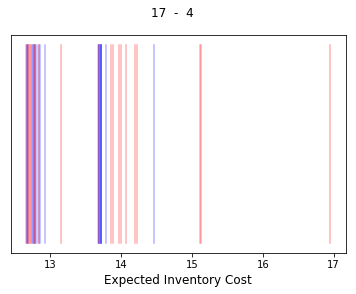

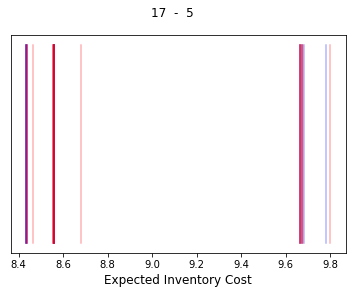

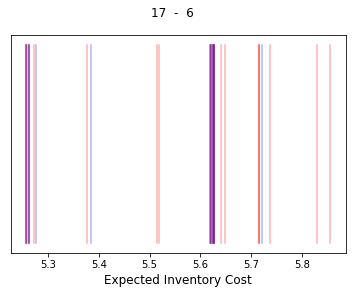

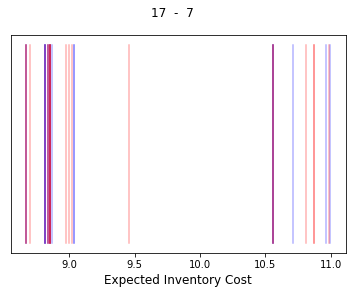

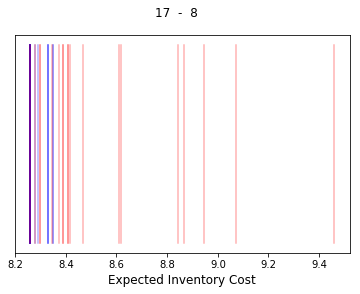

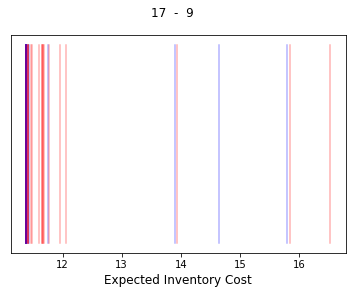

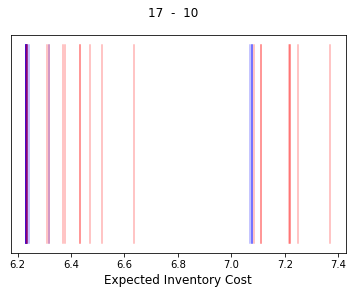

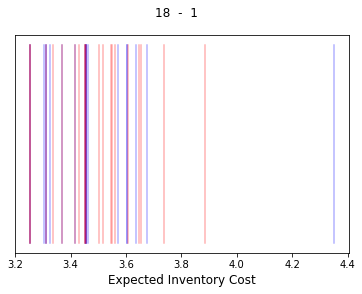

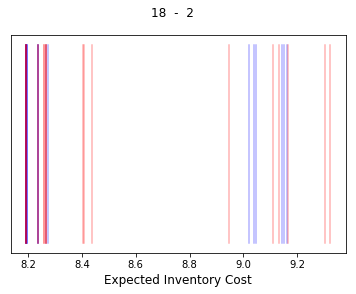

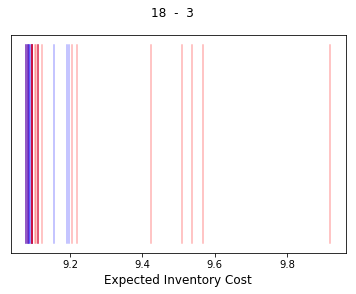

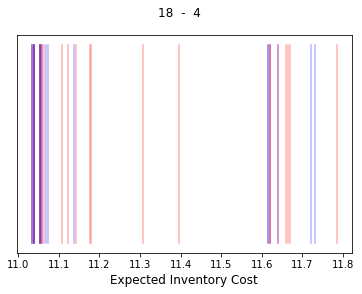

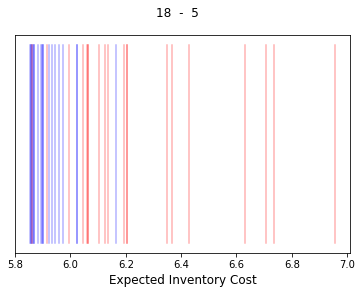

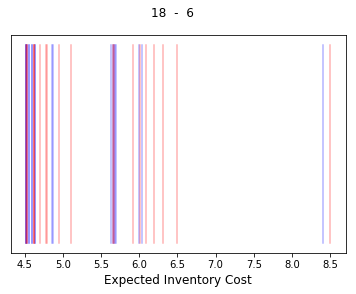

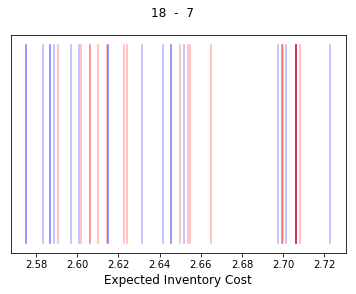

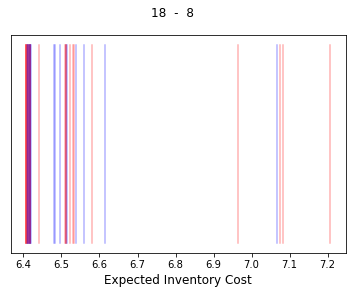

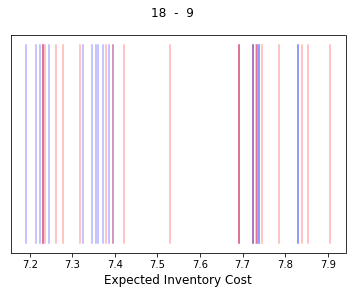

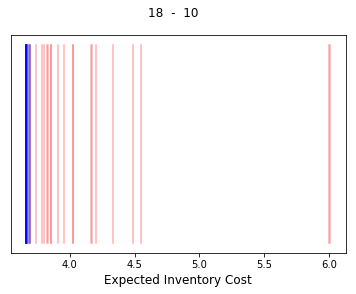

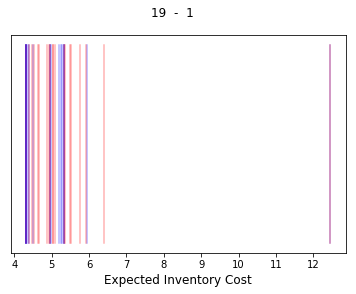

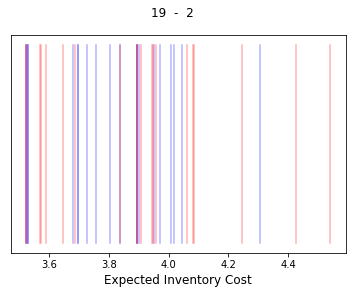

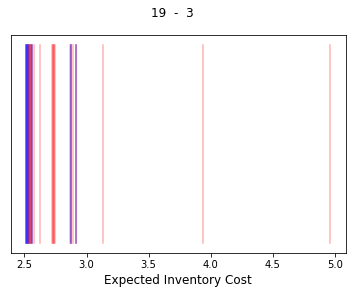

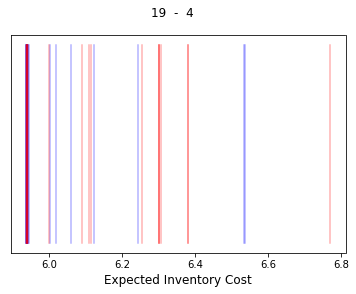

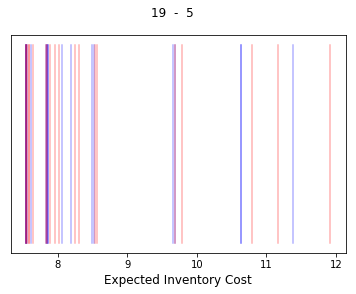

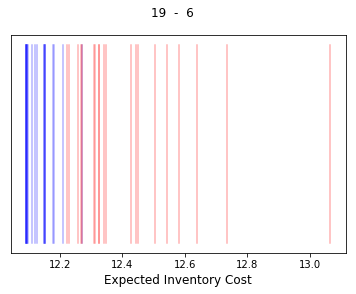

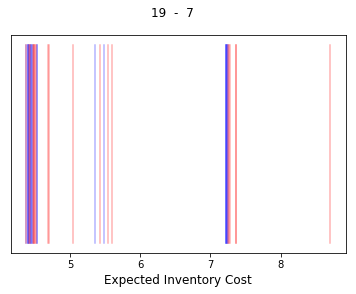

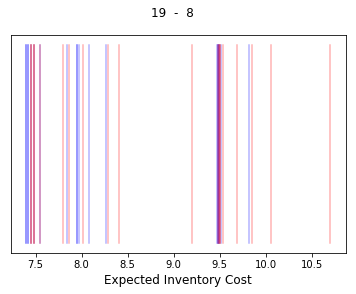

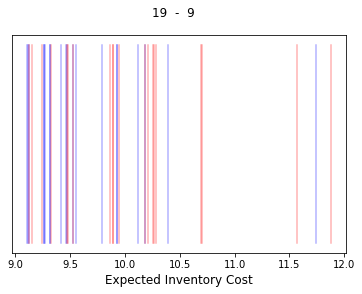

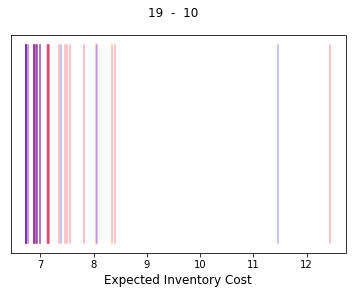

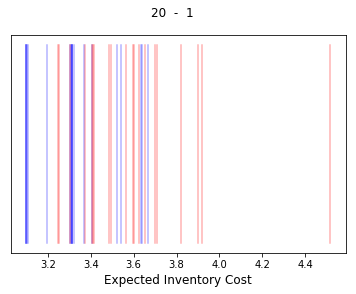

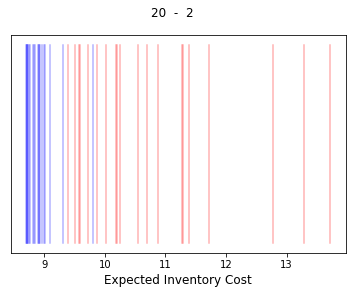

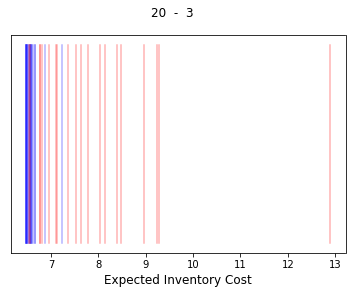

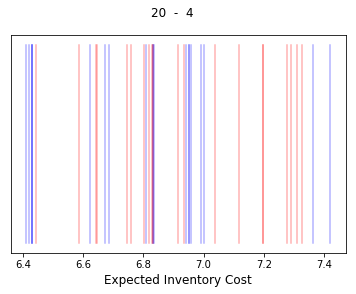

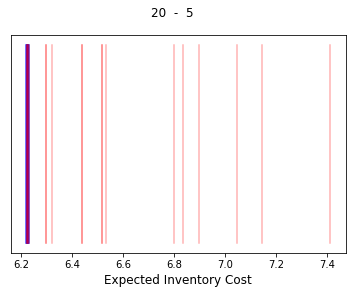

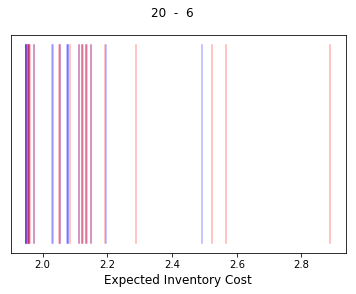

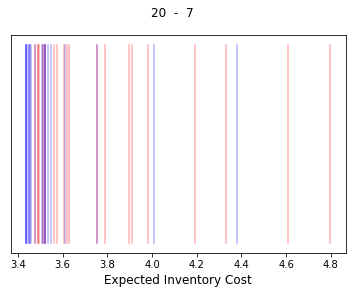

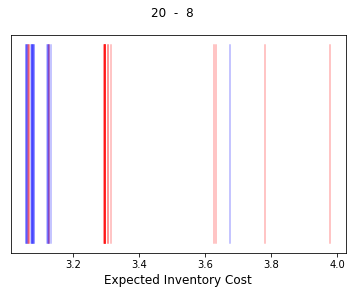

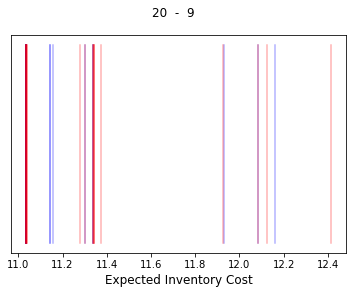

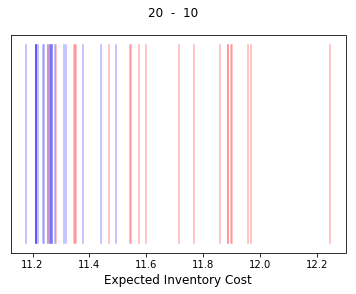

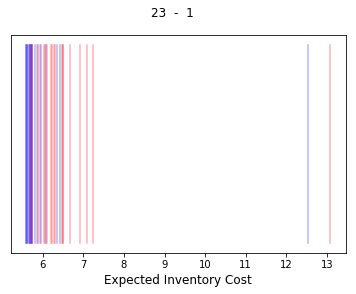

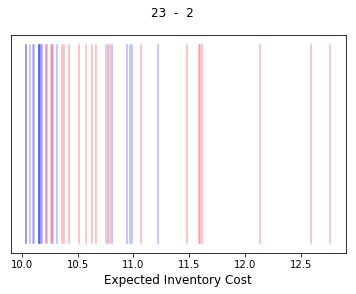

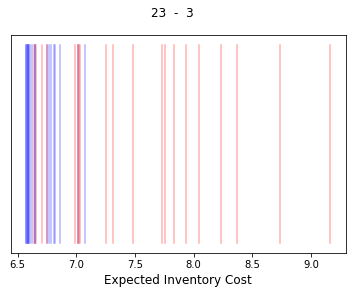

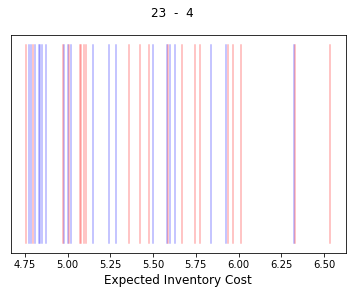

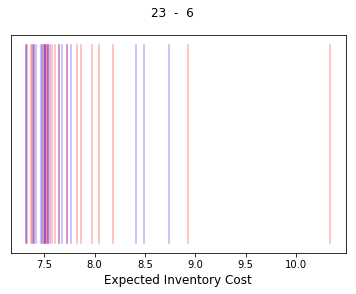

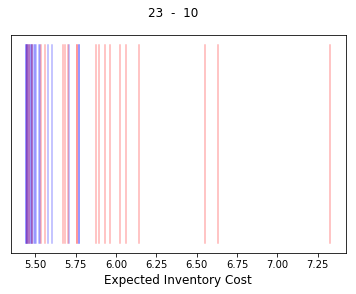

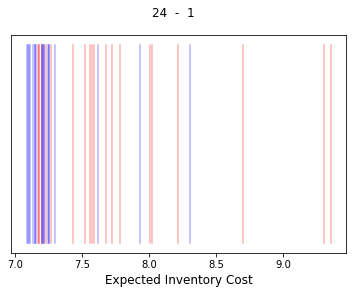

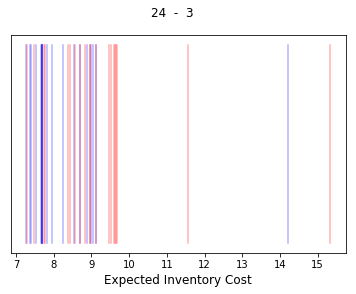

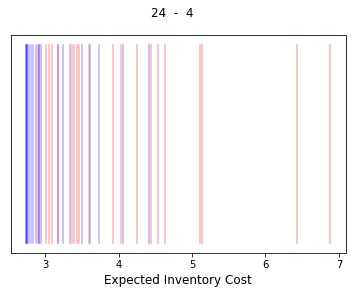

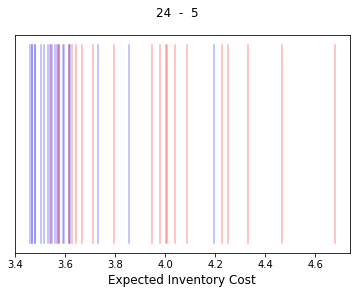

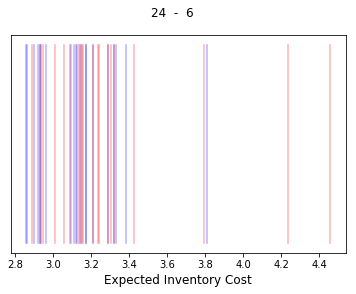

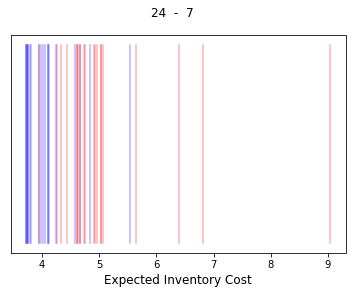

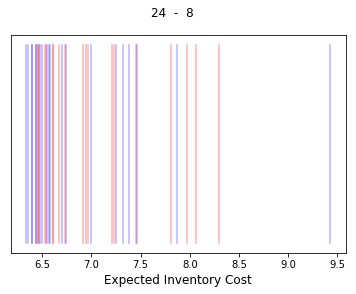

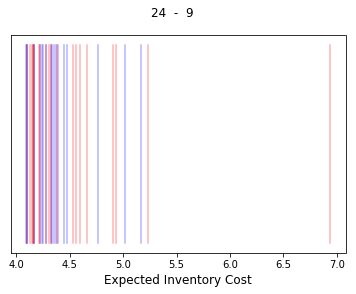

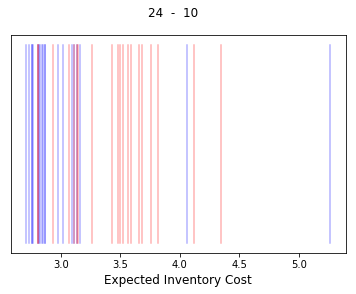

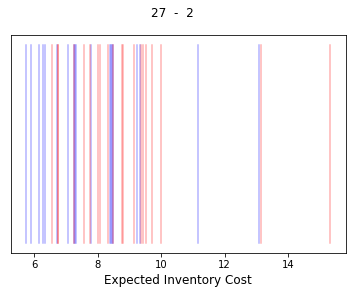

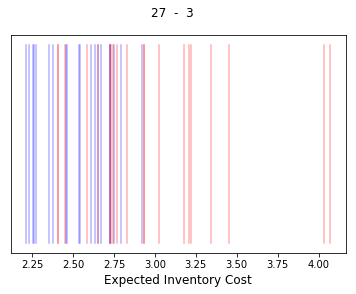

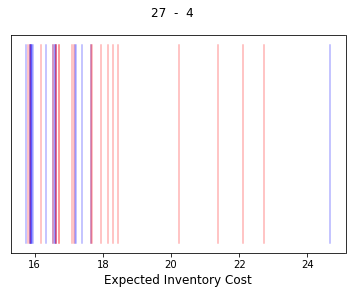

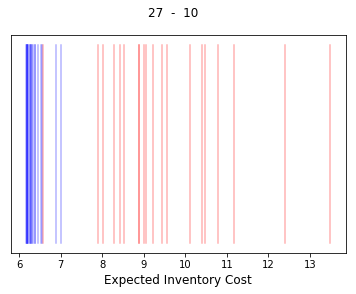

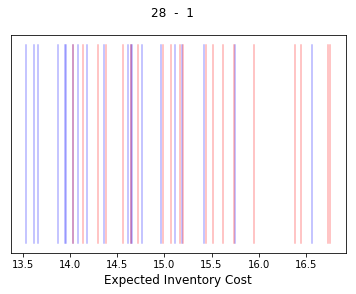

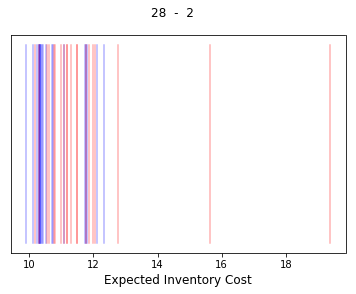

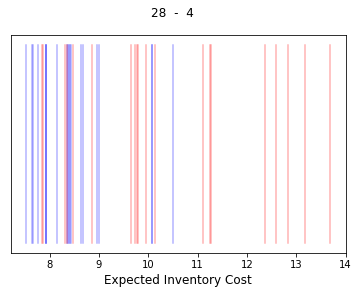

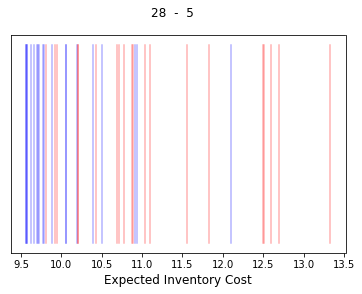

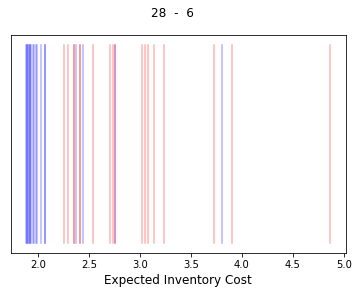

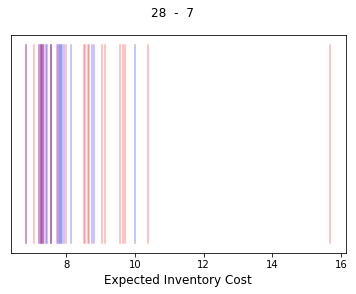

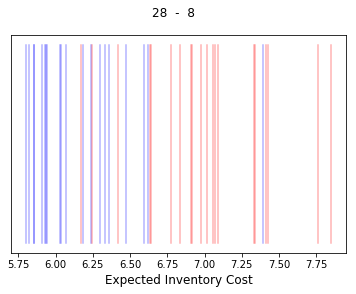

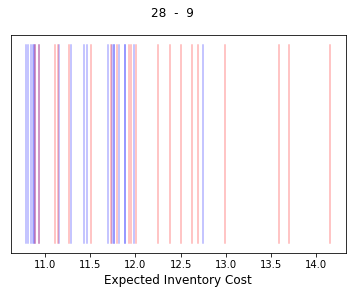

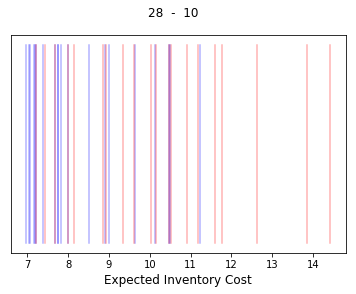

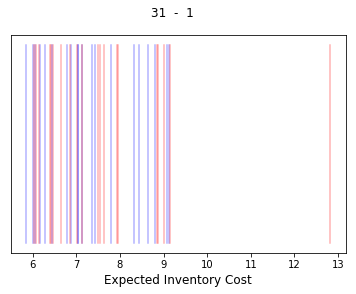

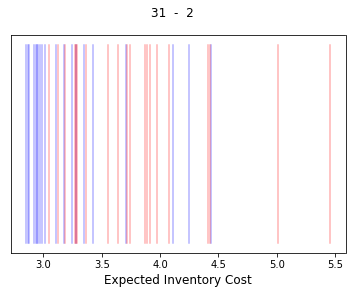

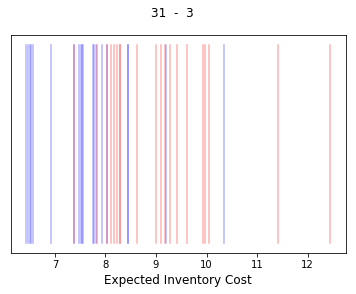

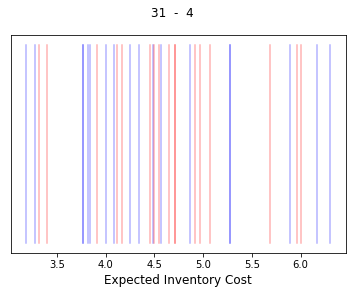

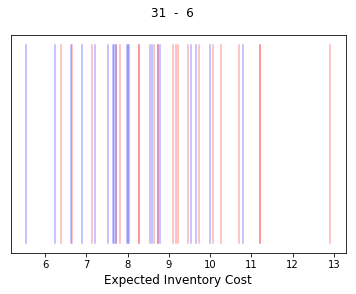

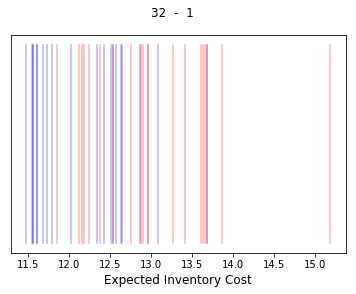

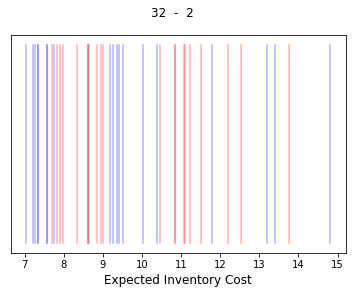

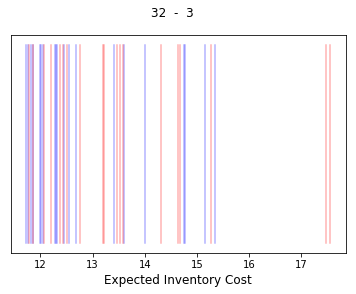

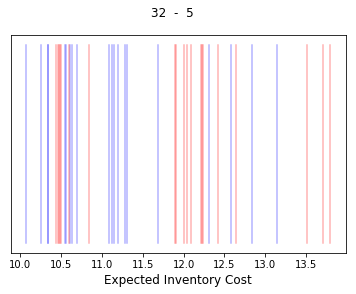

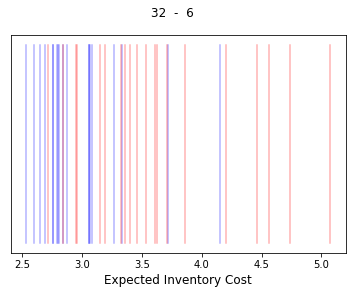

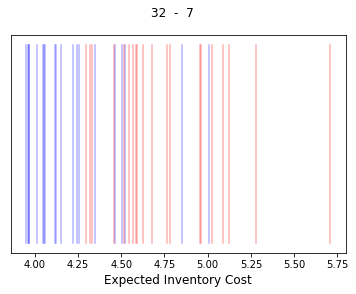

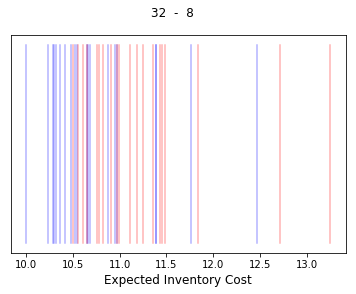

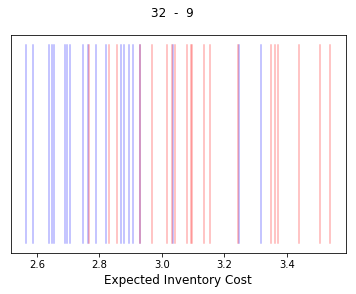

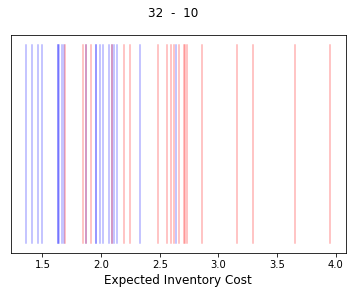

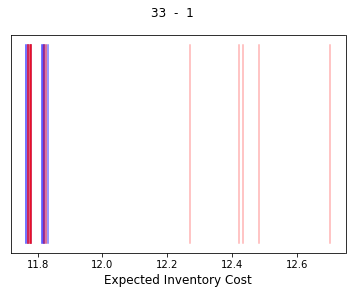

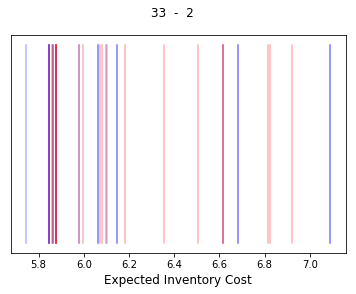

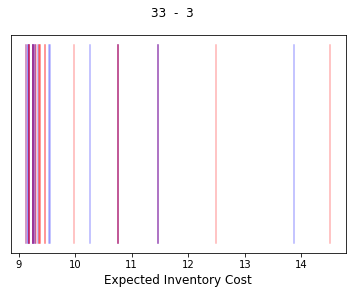

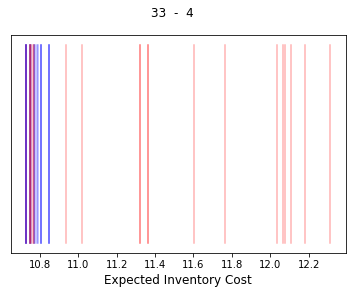

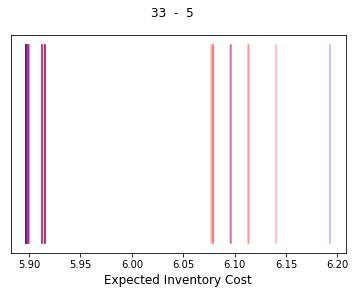

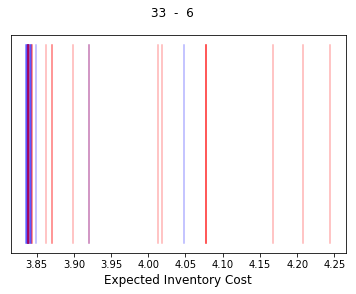

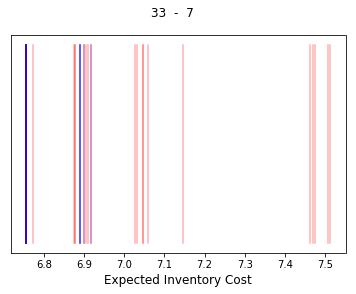

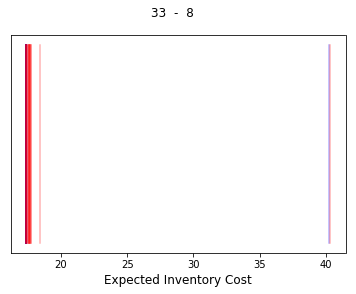

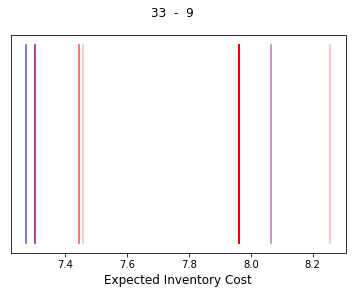

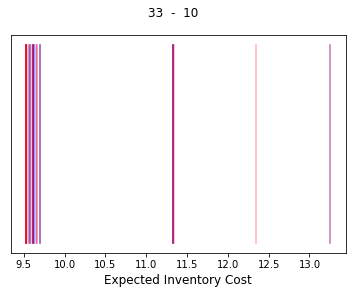

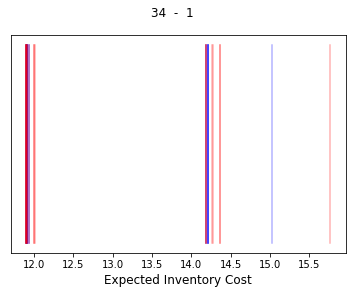

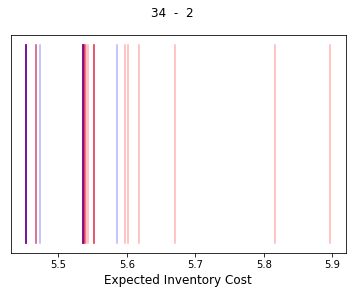

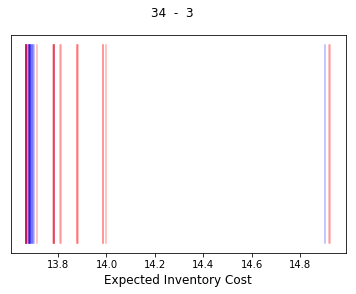

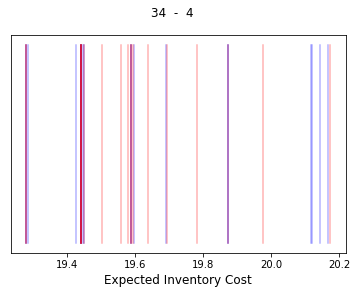

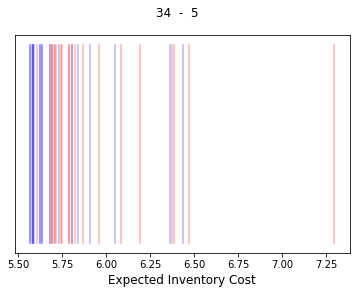

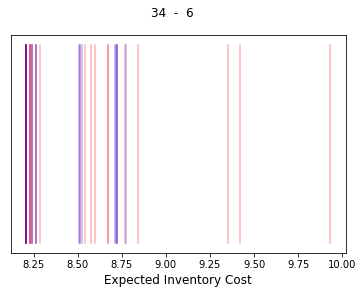

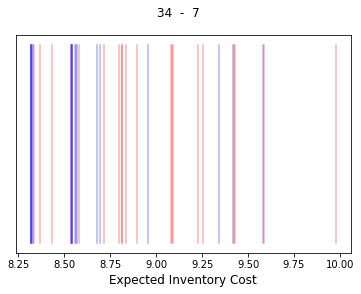

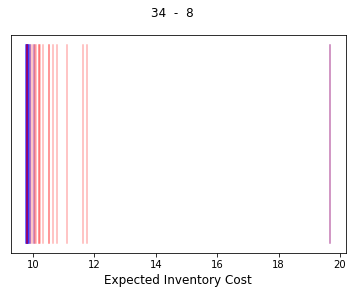

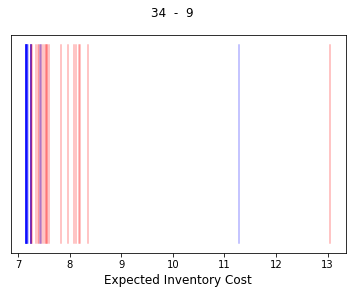

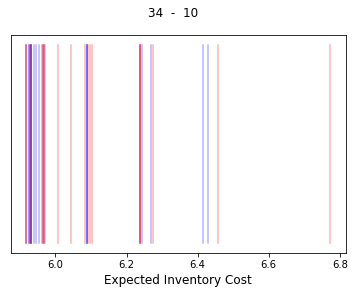

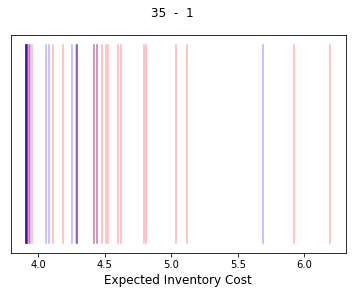

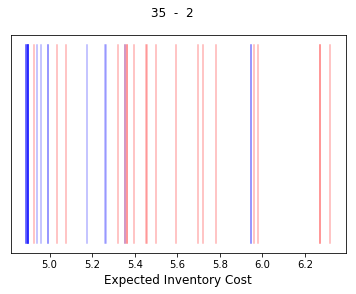

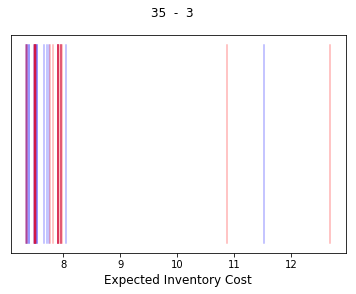

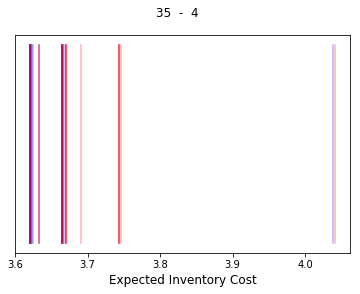

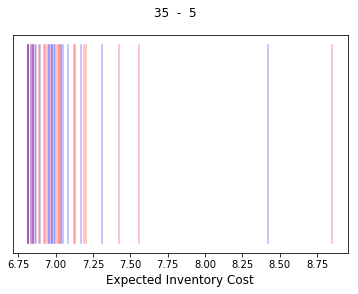

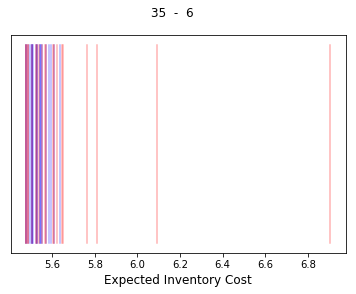

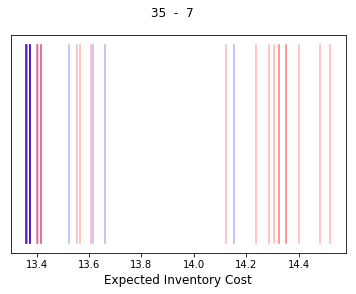

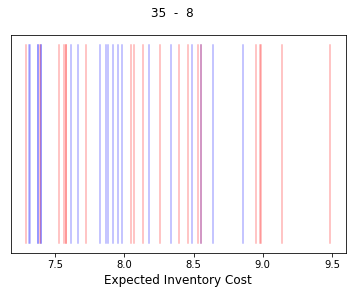

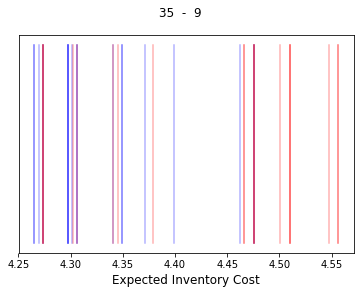

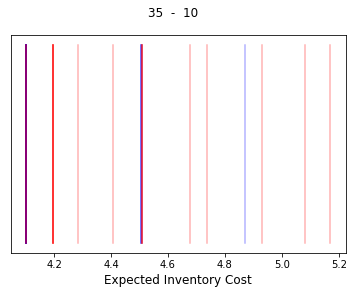

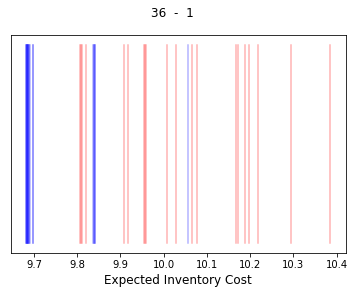

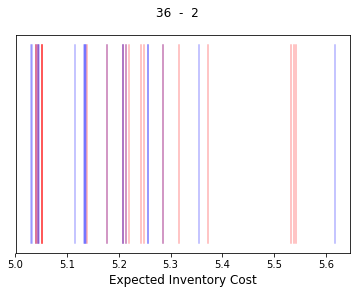

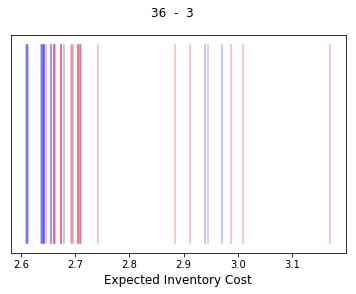

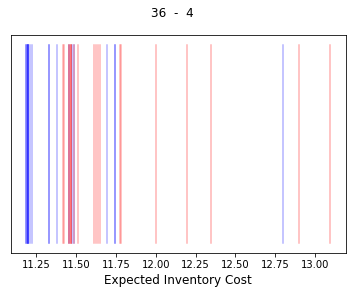

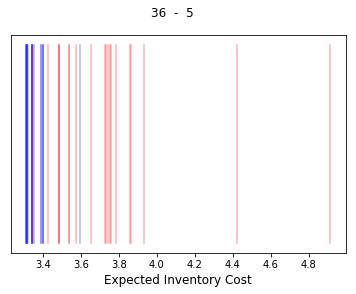

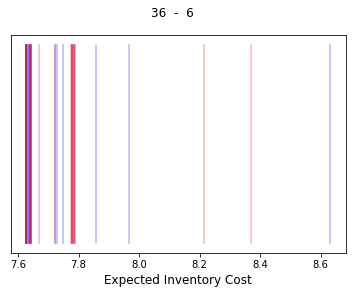

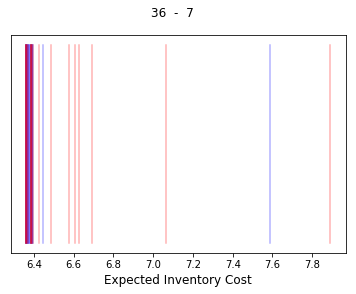

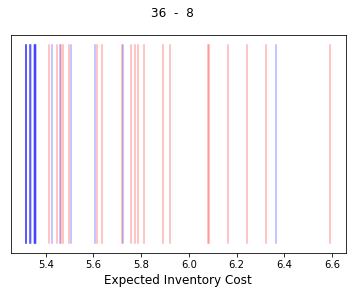

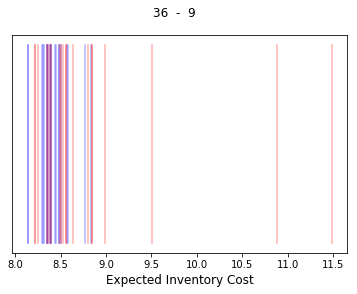

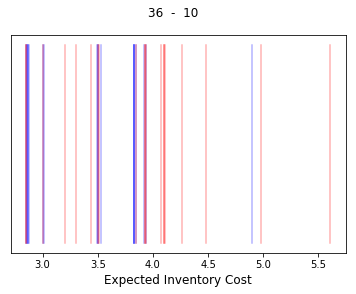

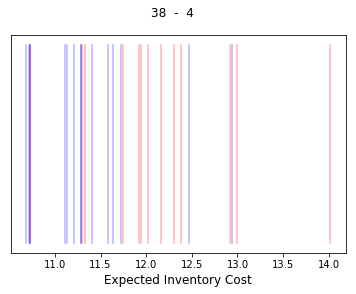

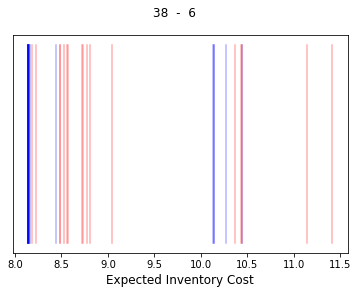

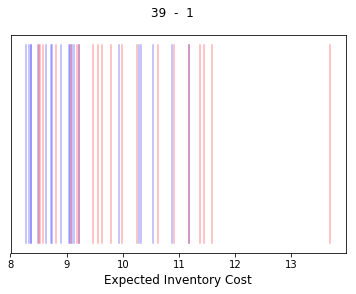

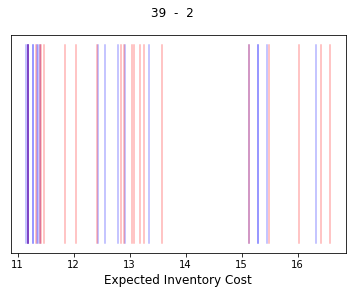

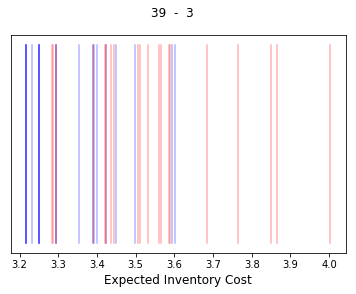

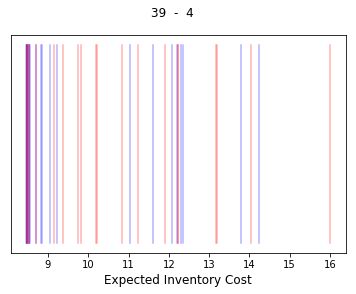

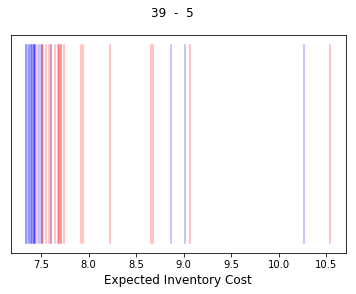

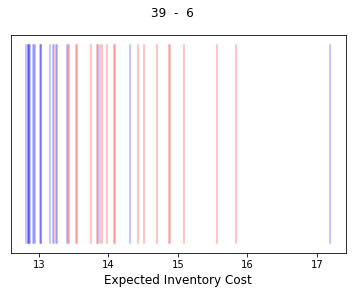

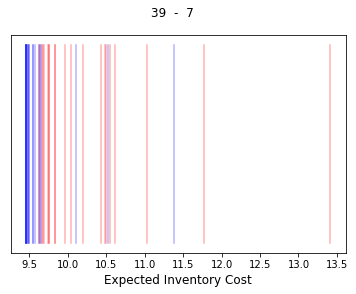

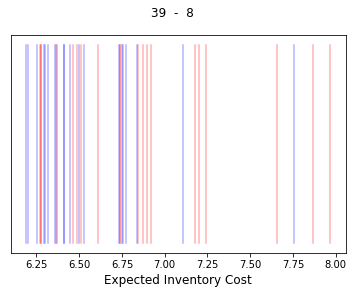

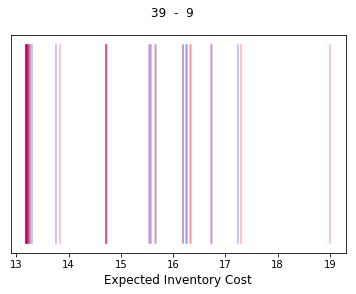

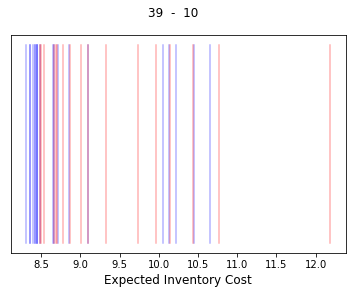

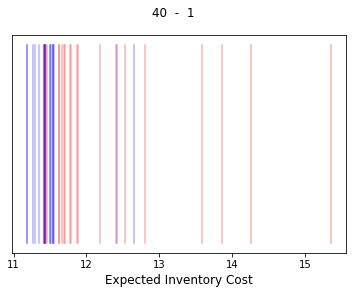

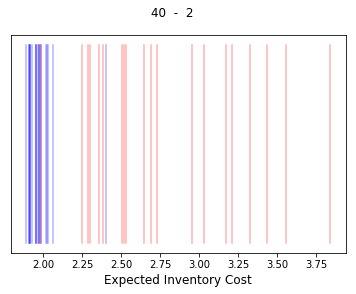

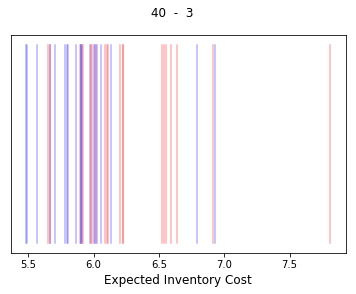

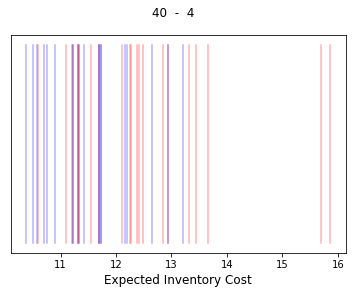

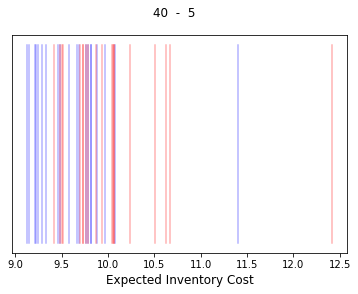

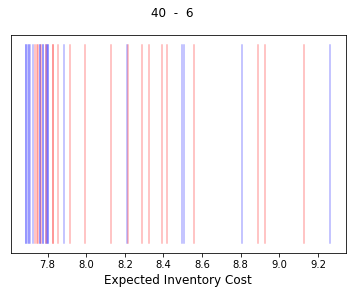

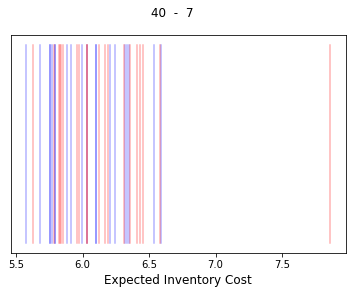

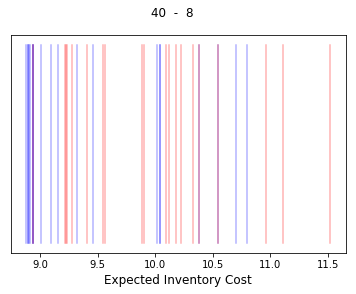

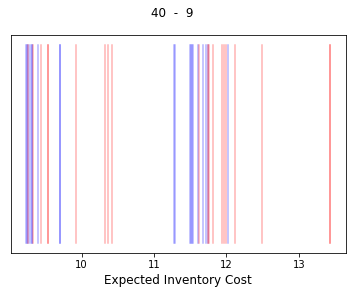

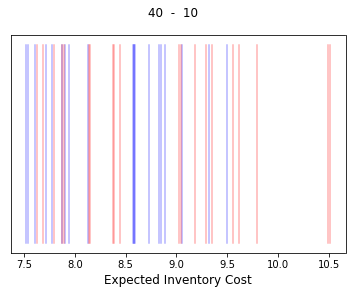

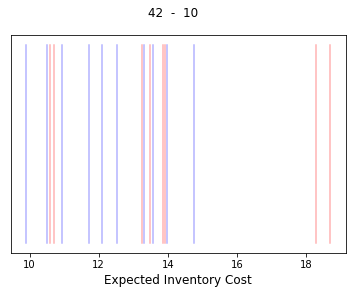

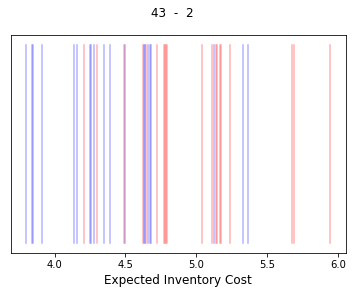

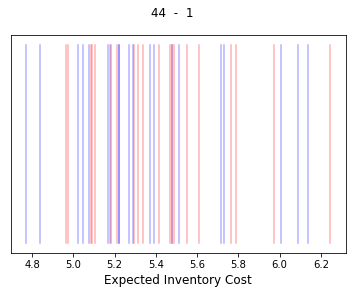

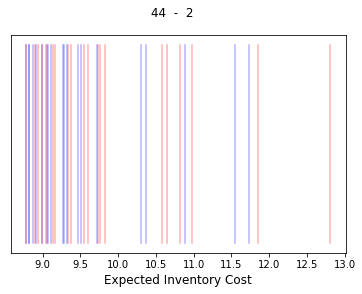

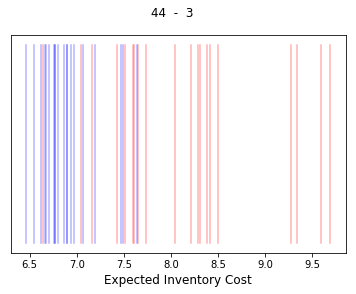

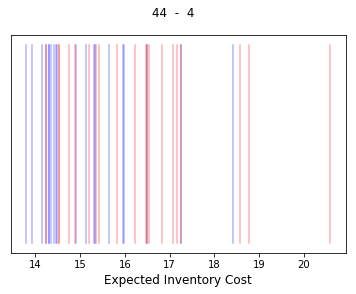

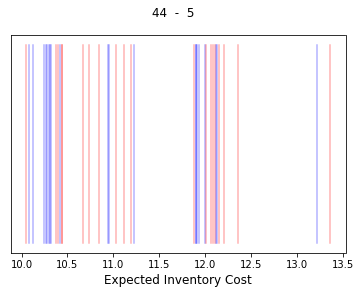

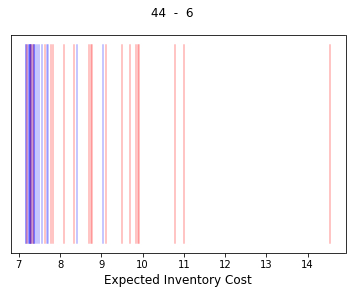

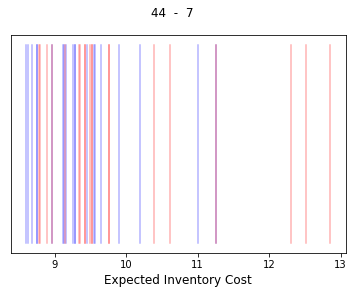

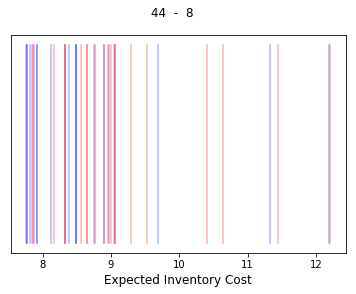

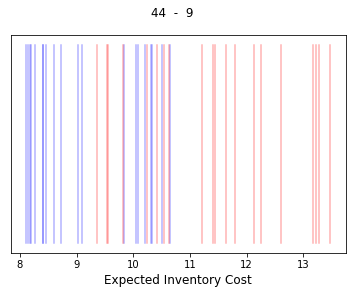

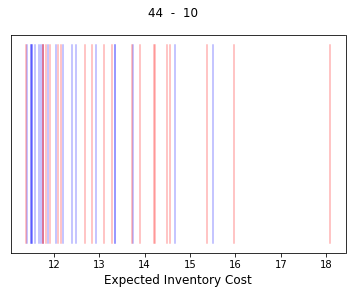

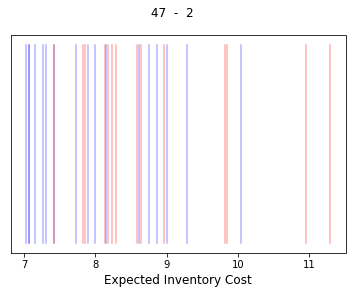

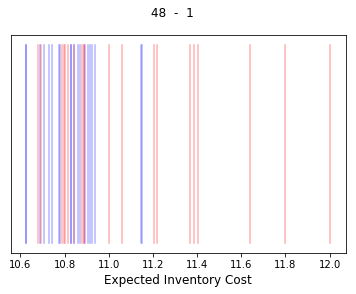

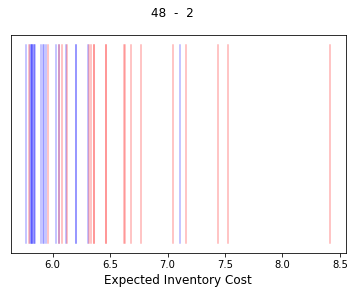

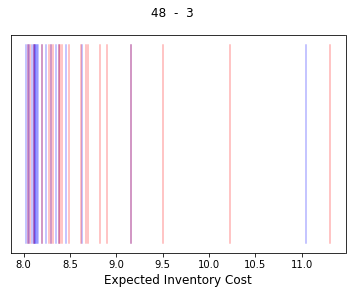

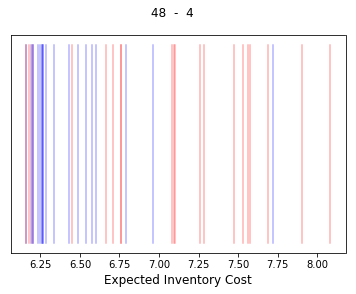

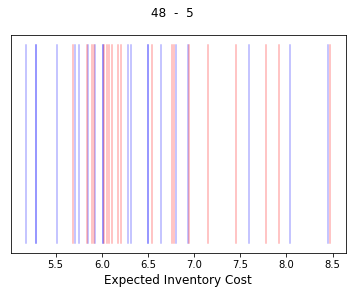

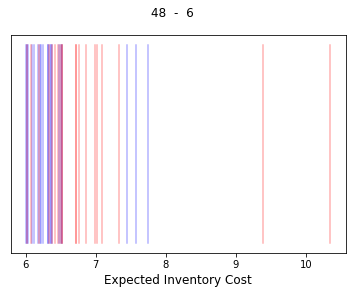

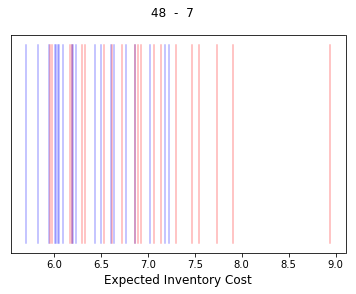

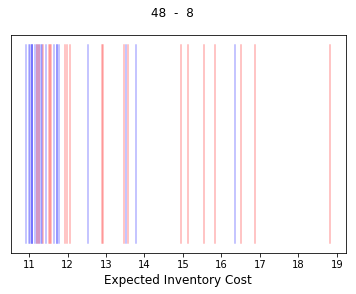

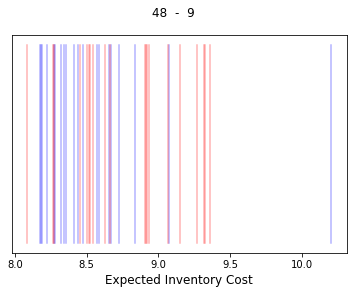

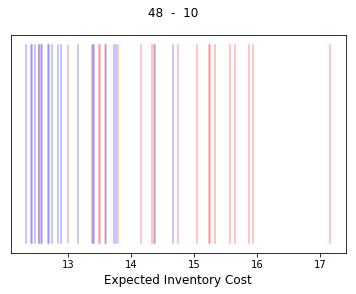

In [51]:
for k in tests:
    fig = plt.figure()
    fig.suptitle('{}  -  {}'.format(k[0],k[1]))
    sfct = pd.read_csv('sfct_simul/' + str(k[0]) + '_' + str(k[1]) + '.simul', header=None)
    isfct = pd.read_csv('isfct_simul/' + str(k[0]) + '_' + str(k[1]) + '.simul', header=None)
    s = np.array(list(sfct[0]))
    s = s[(s!='FALSE')&(s!='EXCEPT')]
    s = np.array(s).astype(np.float)
    i = np.array(list(isfct[0]))
    i = i[(i!='FALSE')&(i!='EXCEPT')]
    i = np.array(i).astype(np.float)
    for ii in i:
        plt.plot([ii,ii], [0,1], 'b', alpha=0.3)
    for ss in s:
        plt.plot([ss,ss], [0,1], 'r', alpha=0.3)
    plt.xlabel('Expected Inventory Cost', fontsize=12)
    plt.yticks([])
    plt.show()